# Leake Classification diagram
- This notebook shows how to plot Amphiboles on the Leake Calcic ampibole classification diagram
- At present, we have only included the bottom figure from Leake et al. (1997) for the calcic amphiboles
- If you really need other diagrams, please reach out to Penny and she can maybe add some of the other ones!
- You can download the excel spreadsheet with data here:
https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Amphibole/Amphibole_Liquids.xlsx

In [1]:
# Load in some import Python things, and Thermobar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [10]:
#!pip install Thermobar

In [2]:
# Set some plotting parameters
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Import amphiboles and associated liquids
- These amphiboles are from 2 units, unit 1 and unit 2

In [3]:
out=pt.import_excel('Amphibole_Liquids.xlsx', sheet_name="Amp_only_for_plotting")
my_input=out['my_input']
Amps=out['Amps']

In [4]:
## Check everything loaded in right, e.g., check no columns filled with zeros that should have data
display(Amps.head())

,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,42.43,2.50,12.97,7.80,0.09,15.56,11.21,2.41,1.61,0.31,0,0,Unit1
1,41.19,2.62,12.25,9.44,0.11,15.67,11.54,2.44,1.40,0.10,0,0,Unit1
2,45.69,1.44,9.64,13.37,0.21,14.57,10.72,1.76,0.23,0.00,0,0,Unit1
3,45.56,1.43,10.40,12.27,0.21,15.15,11.03,1.89,0.25,0.00,0,0,Unit1
4,45.65,1.55,10.78,13.30,0.21,14.21,10.81,1.89,0.27,0.00,0,0,Unit1


## Once we've loaded the data in, we can use the loc function to extract separate dataframes for unit 1 and unit2

In [5]:
Amps_Unit1=Amps.loc[Amps['Sample_ID_Amp']=="Unit1"]
Amps_Unit2=Amps.loc[Amps['Sample_ID_Amp']=="Unit2"]

## This function makes the plot automatically
- Here, we are plotting the amphiboles on Fig. 3 (bottom) from Leake, which is for Ca_B<1.5, and Na_A + K_A <0.5, CaA < 0.50
- The option "site_check=True" means that it only plots amphibles which fit these criteria, and the printed message tells you how many were excluded. If you want to plot ones outside this Ca_B and Na_A and K_A range anyway, select site_check=False. 
- This is not as customizable as the bottom option, where we show how to construct the plot yourself, but provides a good first look. 

0 amphiboles have Ca_B<1.5, so arent shown on this plot
0 amphiboles have Ca_A>=0.5, so arent shown on this plot
17 amphiboles have Na_A+K_A>0.5, so arent shown on this plot


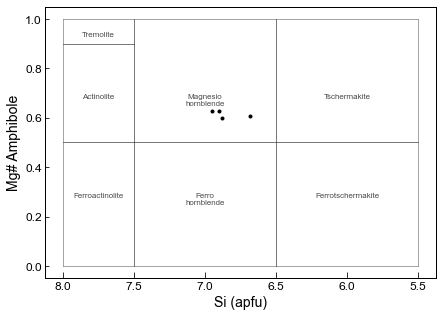

In [6]:
fig=pt.plot_amp_class_Leake(amp_comps=Amps, fontsize=8, color=[0.3, 0.3, 0.3],
linewidth=0.5, lower_text=0.3, upper_text=0.7, text_labels=True, site_check=True,
plots="Ca_Amphiboles", marker='.k')

## Making a more customizable plot, e.g., plotting different units as different colours
- Here, we are plotting the amphiboles on Fig. 3a from Leake, which is for Ca_B<1.5, and Na_A + K_A <0.5
- By default, this code will plot all amphiboles, some of which may not actually lie on this diagram. 

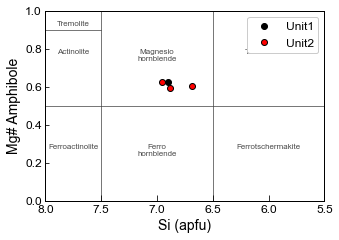

In [9]:
fig, (ax1) = plt.subplots(1, figsize=(5, 3.5), sharey=True)

# First, add the fields to your axis
pt.add_Leake_Amp_Fields_Fig3bot(ax1, fontsize=8, color=[0.3, 0.3, 0.3],
linewidth=0.5, lower_text=0.3, upper_text=0.8, text_labels=True)

# Now calculate the amphibole components
cat_23ox_Unit1=pt.calculate_Leake_Diagram_Class(amp_comps=Amps_Unit1)
cat_23ox_Unit2=pt.calculate_Leake_Diagram_Class(amp_comps=Amps_Unit2)

# You only want the ones where "Diagram" = Fig. 3 - bottom - LHS, 
#Lets use Loc to find these rows
cat_23ox_Unit1_Correct=cat_23ox_Unit1.loc[
    cat_23ox_Unit1['Diagram']=="Fig. 3 - bottom - LHS"]
cat_23ox_Unit2_Correct=cat_23ox_Unit2.loc[
    cat_23ox_Unit2['Diagram']=="Fig. 3 - bottom - LHS"]

# Now add these components to the axis, you can change symbol size, plot multiple amphioble populations in different colors. 
ax1.plot(cat_23ox_Unit1_Correct['Si_Amp_cat_23ox'], 
         cat_23ox_Unit1_Correct['Mgno_Amp'], 'ok', label='Unit1')
ax1.plot(cat_23ox_Unit2_Correct['Si_Amp_cat_23ox'], 
         cat_23ox_Unit2_Correct['Mgno_Amp'], 'ok', mfc='red', label='Unit2')

# Now reverse the x axis to match the common way of showing this in the literature
ax1.invert_xaxis()

# Add the axes labels
ax1.set_ylabel('Mg# Amphibole')
ax1.set_xlabel('Si (apfu)')

# Add a legend
ax1.legend(loc='upper right', facecolor='white', framealpha=1)

# Adjust axis - Here, incorperate limit of diagram, 
# but could trim to emphasize certain bits of data. 
ax1.set_ylim([0, 1])
ax1.set_xlim([8, 5.5])
fig.savefig('Amp_Diagram.png', dpi=300)